In [13]:
from sklearn.datasets import load_breast_cancer  # loading the dataset
from sklearn.model_selection import train_test_split  # splitting the dataset
import lightgbm as lgb  # classification algorithm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, auc, roc_auc_score, ConfusionMatrixDisplay  # accuracy metrics
from joblib import dump  # saving the model
import numpy as np  # data processing
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # data plotting

In [14]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
breast_cancer = load_breast_cancer()
df_breast_cancer = sklearn_to_df(breast_cancer)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
X = df_breast_cancer.iloc[:, :-1].values
y = df_breast_cancer.iloc[:, -1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [17]:
lgbc = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
lgbc.fit(X_train, y_train)
y_pred = lgbc.predict(X_test)

In [18]:
lgbc_con_matrix = confusion_matrix(y_test, y_pred)
lgbc_acc = accuracy_score(y_test, y_pred)
print('Confusion Matrix', '\n', lgbc_con_matrix, '\n')
print('Accuracy of Light Gradient Boosting Classification :', lgbc_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred))

Confusion Matrix 
 [[20  2]
 [ 1 34]] 

Accuracy of Light Gradient Boosting Classification : 94.73684210526315 

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.94      0.97      0.96        35

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



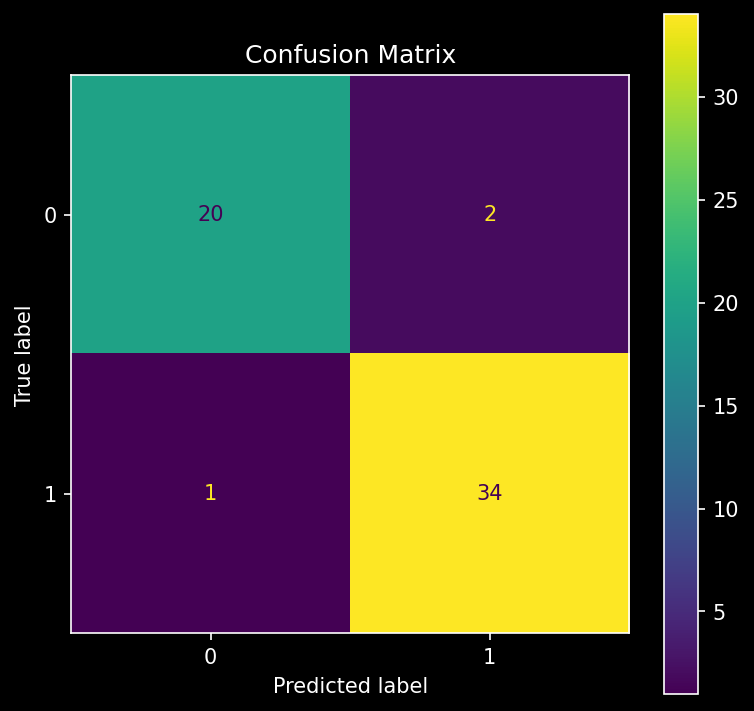

In [19]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
ConfusionMatrixDisplay(lgbc_con_matrix).plot(ax=ax)
plt.title('Confusion Matrix')
plt.savefig('Images/Confusion_Matrix_Light_Gradient_Boosting_Classification.png', bbox_inches='tight')

In [20]:
y_score = lgbc.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

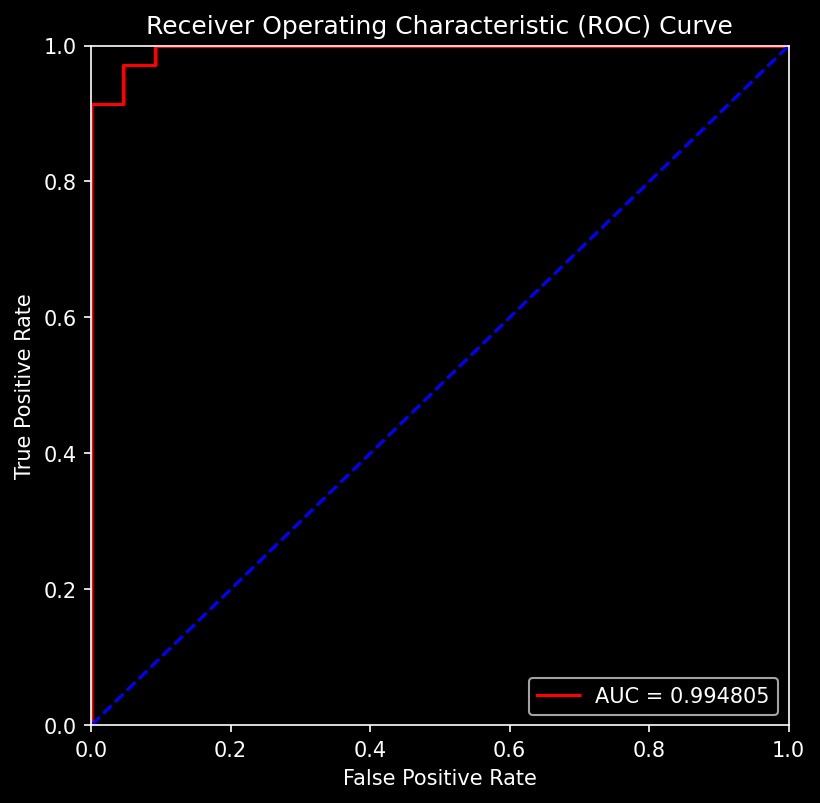

In [21]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(false_positive_rate, true_positive_rate, 'r', label='AUC = %f' % roc_auc)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Images/ROC_Curve_Light_Gradient_Boosting_Classification.png', bbox_inches='tight')

In [22]:
print('Area Under the Receiver Operating Characteristic Curve :', roc_auc_score(y_test, y_score))

Area Under the Receiver Operating Characteristic Curve : 0.9948051948051948


In [23]:
dump(lgbc, 'lightGradientBoostingClassifier.joblib')

['lightGradientBoostingClassifier.joblib']